<IPython.core.display.Javascript object>


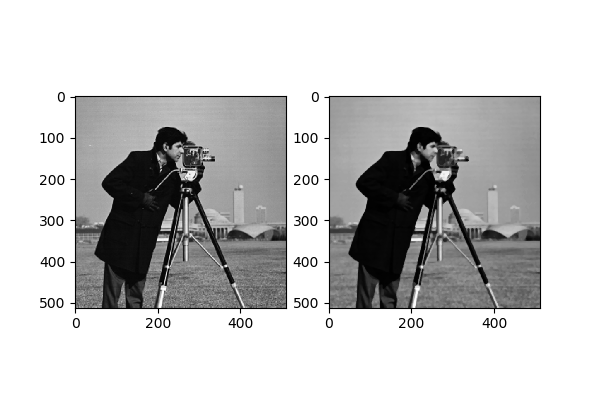

interactive(children=(IntSlider(value=1, description='Median_Size', max=21, min=1, step=2), Output()), _dom_cl…

<function __main__.f(Median_Size)>

In [1]:
%matplotlib notebook
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data

imgs_median = {}

def f(Median_Size):
    if not(int(Median_Size) in imgs_median):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            selem = disk(int(Median_Size))
            img_median = rank.median(img_gray, selem=selem) 
            imgs_median[int(Median_Size)] = img_median
    else:
        img_median = imgs_median[int(Median_Size)]
        
    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    #plt.imshow(img_median, cmap="gray") #This would work
    #plt.show()

image = skimage.data.camera() #plt.imread("Test.png")       
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(6, 4))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")

interact(f, Median_Size=widgets.IntSlider(min=1,max=21,step=2,value=1)) 